# Project Name: Air Quality Index Predictor


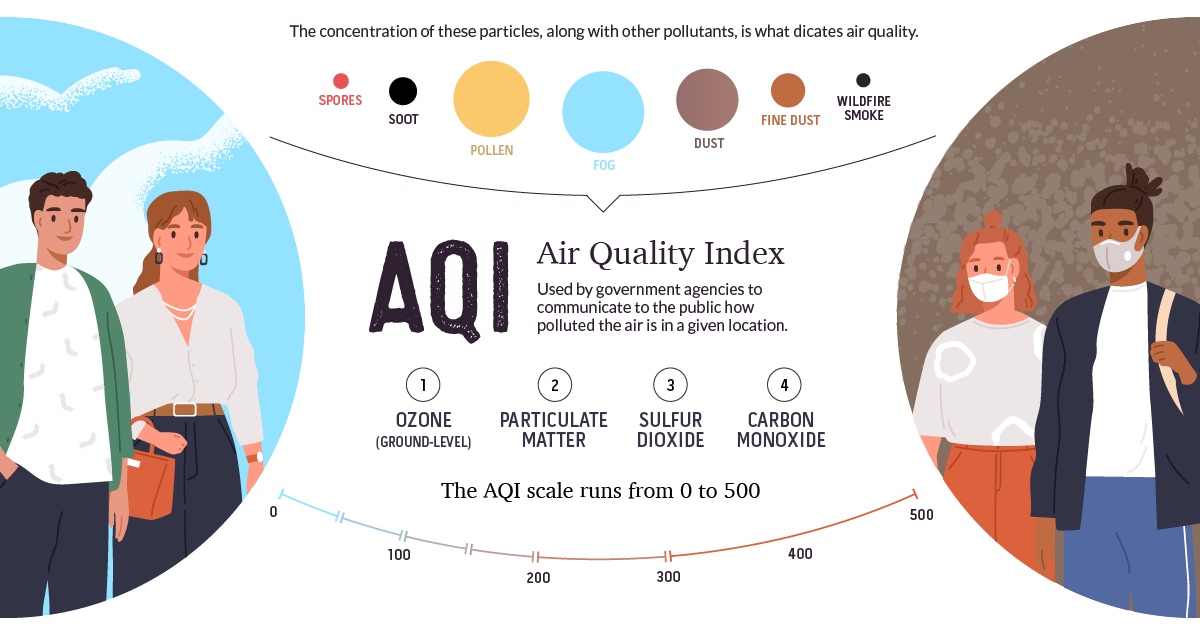

## Aim :
### In this project we will be building an Air Quality Index Predictor with the help of Machine Learning Models and Auto ML library i.e. TPOT

### In this project we are having a data set of Bangalore city which have the Air Quality Index information from the year 2013-2018. 

### This data was taken from a website (https://en.tutiempo.net/) 

## Time Line of the Project:

- Data Analysis
- Fearure Engineering
- Model Building and Prediction using ML models
- Model Building and Prediction using TPOT(Auto ML)

### Importing Libraries:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading our Data Set

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df= pd.read_csv("/content/drive/MyDrive/AQI Data.csv")

In [ ]:
df.head()

## Understanding our Data

### Let us understand what these abbreviations stand for :

- T	 = Average annual temperature
- TM = Annual average maximum temperature
- Tm = Average annual minimum temperature
- SLP = Sea Level Pressure
- H = Humidity
- V	= Annual average wind speed
- VM = Maximum wind speed
- PM 5 : This is our Dependent variable i.e. our Air Quality Index

### Checking Null Values

In [ ]:
df.isnull().sum()

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

#### Seeing unique values

In [ ]:
df.nunique()

In [ ]:
print(df.dtypes)
print("Shape :",df.shape)

#### All are continuous variables

In [ ]:
print(df.describe())

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df['PM 2.5'], color='g', bins=100, hist_kws={'alpha': 0.4})

###  An AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality.

In [ ]:
col= df.columns

In [ ]:
col

In [ ]:
for i in col:
    plt.figure(figsize=(9, 8))
    sns.distplot(df[i], color='g', bins=100, hist_kws={'alpha': 0.4})

In [ ]:
sns.pairplot(df)

#### Plotting a Heat Map

In [ ]:
relation= df.corr()

In [ ]:
top_corr_features = relation.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df.head()

### Plotting s Q-Q Plot

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [ ]:
for i in col:
    plot_curve(df,i)

### Divide our Data Set in Dependent and Independent variable

In [ ]:
x=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [ ]:
x.head()

In [ ]:
y.head()

### Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

In [ ]:
print(model.feature_importances_)

#### Plot graph of feature importances for better visualization

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')
plt.show()

### Let us Standardise our Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale= StandardScaler()

In [ ]:
x= scale.fit_transform(x)

### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Model Building and Prediction using ML models

### We will be using the following models:
- Linear Regression
- Xgboost Regressor
- Random Forest Regressor
#### And doing the Hyperameter tuning for the above


### Using Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
regressor.coef_

In [ ]:
regressor.intercept_

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [ ]:
score.mean()

In [ ]:
prediction=regressor.predict(X_test)

In [ ]:
sns.distplot(y_test-prediction)

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [ ]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, prediction))

### Using XG Boost Regression Model

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg= XGBRegressor()

#### Let us use Randomised Search CV with XG Boost regressor to find the best parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### First we will define various parameters and their values used in XGB Regressor

In [ ]:
# No.of Estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
# Different learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
print(learning_rate)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
print(subsample)
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
print(min_child_weight)

#### Storing all these params in a dict

In [ ]:
param= {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}
print(param)


### Running our Randomised Search CV for best params

In [ ]:
xgb_random= RandomizedSearchCV(estimator = xg, param_distributions = param,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
xgb_random.fit(X_train,y_train)

In [ ]:
xgb_random.best_params_

### Fitting our Model with best  Params

In [ ]:
xgr = XGBRegressor(subsample= 0.8,
 n_estimators= 1100,
 min_child_weight= 3,
 max_depth= 30,
 learning_rate= 0.05)

In [ ]:
xgr.fit(X_train,y_train)

### Predictions and Accuracy

In [ ]:
predictions=xgr.predict(X_test)

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, predictions))

### Using Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

#### Using Randomized Search CV for best params

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#### Defining params

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [ ]:

params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(params)

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

### Fitting our Model

In [ ]:
rf1= RandomForestRegressor(n_estimators= 500,
 min_samples_split=  2,
min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth=15)

In [ ]:
rf1.fit(X_train,y_train)

In [ ]:
ypred= rf1.predict(X_test)

In [ ]:
sns.distplot(y_test-ypred)

In [ ]:
plt.scatter(y_test,ypred)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, ypred))
print('MSE:', metrics.mean_squared_error(y_test, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

In [ ]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, ypred))

### Importing Pickle for deployment 

In [ ]:
import pickle

#### We will use our best performing model i.e. XGB Regressor

In [ ]:
# open a file, where you ant to store the data
file = open('aqi_XGBreg_model.pkl', 'wb')

# dump information to that file
pickle.dump(xgr, file)

In [ ]:
xgr

# Auto ML :


### Automated machine learning, also referred to as automated ML or AutoML, is the process of automating the time-consuming, iterative tasks of machine learning model development.

# TPOT Auto ML

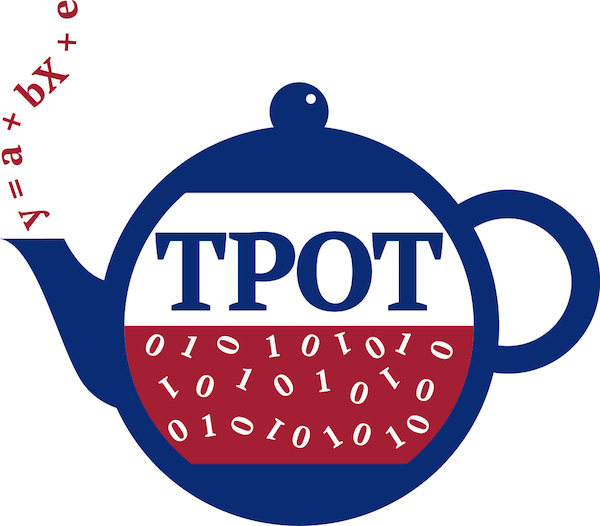

### TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

### Installing TPOT

In [ ]:
!pip install tpot

In [ ]:

# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

In [ ]:
from tpot import TPOTRegressor

### We will use the same data which we used above

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### First, we can define the method for evaluating models. We will use a good practice of repeated k-fold cross-validation with three repeats and 10 folds.

In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
# define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#### Defining our model

In [ ]:
# define search
model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)

In [ ]:
# perform the search
model.fit(X_train, y_train)

In [ ]:
print(model.score(X_test, y_test))

### Finding the best pipeline

In [ ]:
model.fitted_pipeline_

In [ ]:
pred= model.predict(X_test)

### Checking Accuracy

In [ ]:
sns.distplot(y_test-pred)

In [ ]:
plt.scatter(y_test,pred)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, pred))